In [ ]:
# Add parent directory to path for imports
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))

In [1]:
from agricultural_csp.instance import *
from agricultural_csp.evaluator import *
from agricultural_csp.solver.agcsp_ts import *

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [ ]:
from agricultural_csp.tools import display_grid_and_path

In [3]:
# Create a 50 x 50 square grid with five small square obstacles scattered on the grid
obstacle_half_size = 2  # Half-size of each small square obstacle

r_grid, c_grid = np.mgrid[0:50, 0:50]
grid_nodes = np.argwhere((r_grid >= 0) & (r_grid < 50) & (c_grid >= 0) & (c_grid < 50))

# Create five small square obstacles at different positions on the grid
obstacle_positions = [
    (10, 10),  # Top-left area
    (10, 40),  # Top-right area
    (25, 25),  # Center
    (40, 10),  # Bottom-left area
    (40, 40)   # Bottom-right area
]

obstacle_list = []
for obs_r, obs_c in obstacle_positions:
    obstacle = np.argwhere(
        (np.abs(r_grid - obs_r) <= obstacle_half_size) & 
        (np.abs(c_grid - obs_c) <= obstacle_half_size)
    )
    obstacle_list.append(obstacle)

obstacle_nodes = np.vstack(obstacle_list)
instance = AgcspInstance(grid_nodes, obstacle_nodes, 5, 90)

""" instance = AgcspInstance(grid_nodes, np.array([]), 5, 90) """
evaluator = AgcspEvaluator(instance)


Grid Adaptativo: Densidade original (2500)
Grid Adaptativo: Nova densidade (reduzida) (1501 nós)


Coverage: 0/2375 nodes (0.0%)
Obstacles: 0/125 covered


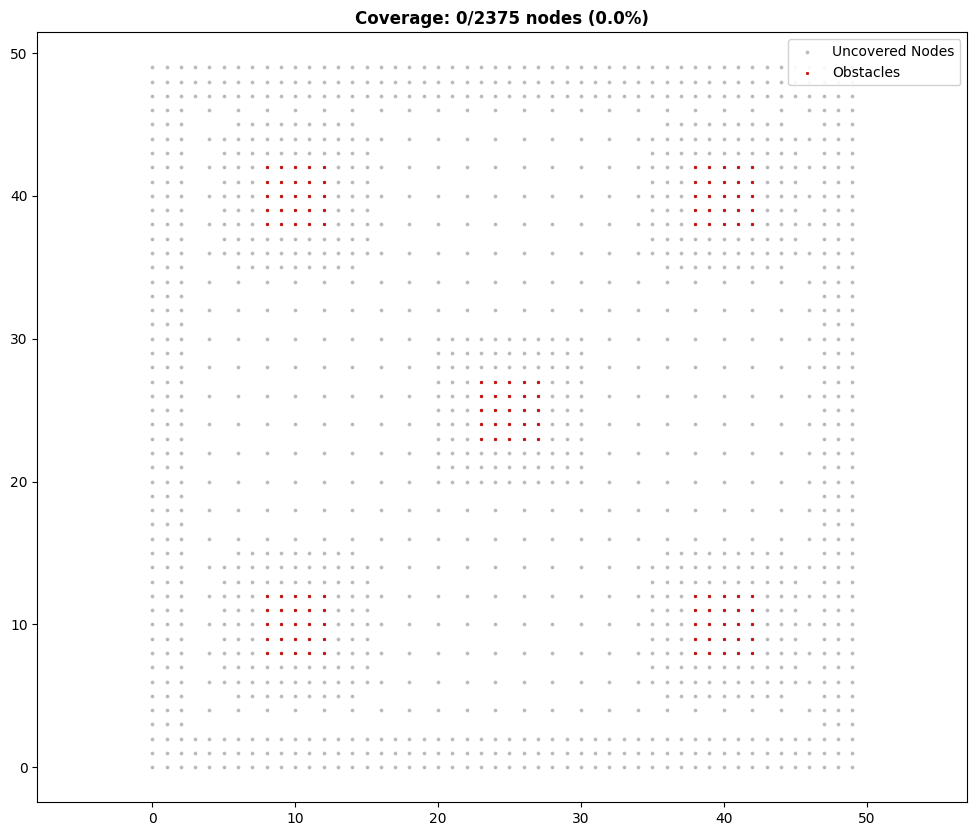

In [4]:
display_grid_and_path(inst=instance, evaluator=evaluator, path=[])

In [5]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.RANDOM,
    phased_optimization=PhasedOptimizationParams(phase_iterations=[5, 1, 5], degradation_tolerances=[0, 0, 0]),
    tabu_radius=3,
    search_strategy='first'
)

term_criteria = TerminationCriteria(max_iterations=300)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

No valid uncovered nodes found. Trying covered nodes near uncovered areas...
Could not find any valid node to add from 1127 candidates.
Coverage: 374/2375 nodes (15.7%)
Obstacles: 0/125 covered


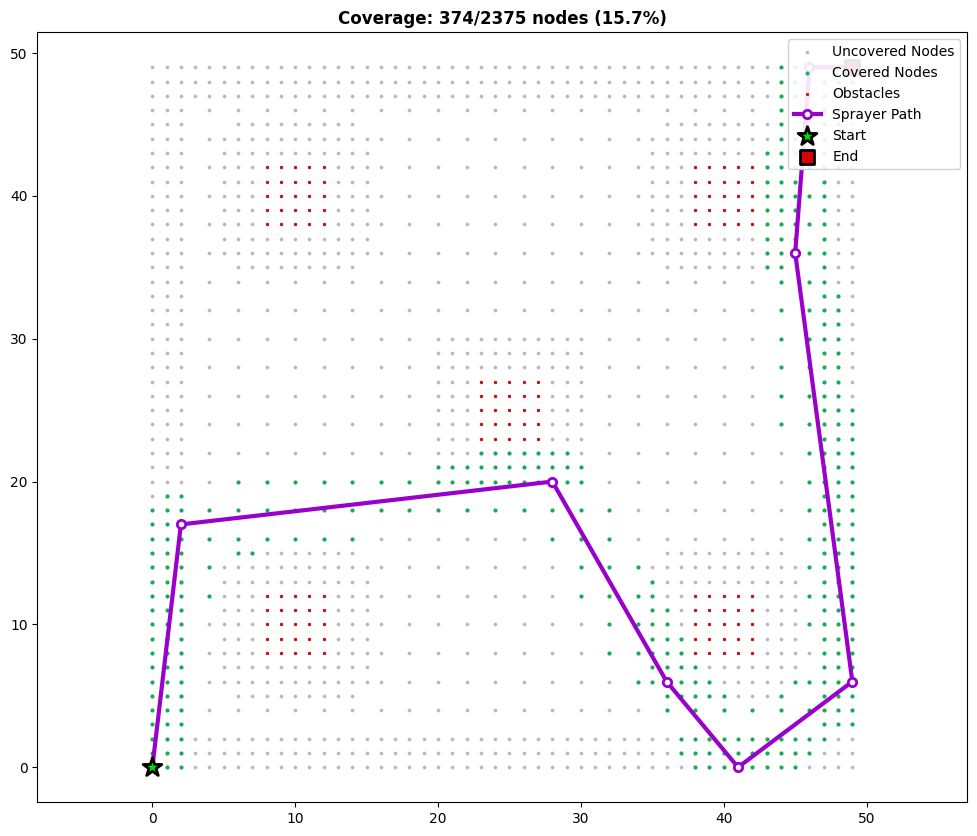

In [6]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [7]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 1391.96
-----------------------------------------------------------
Iteration 0: Best ObjFun = 1391.96, Current ObjFun = 1391.96
Applying move: move with args (6, array([45, 41]))
Iteration 1: Best ObjFun = 1389.36, Current ObjFun = 1389.36
Applying move: insert with args ((np.int64(45), np.int64(1)), 5)
Iteration 2: Best ObjFun = 1388.24, Current ObjFun = 1388.24
Applying move: insert with args ((np.int64(48), np.int64(20)), 7)
Iteration 3: Best ObjFun = 1387.61, Current ObjFun = 1387.61
Applying move: move with args (1, array([ 2, 22]))
Iteration 4: Best ObjFun = 1382.43, Current ObjFun = 1382.43
Applying move: remove with args (6,)
Iteration 5: Best ObjFun = 1375.71, Current ObjFun = 1375.71
Applying move: insert with args ((np.int64(46), np.int64(4)), 6)

=== Trocando para Fase 2 (Objetivo: Otimizar C2) ===
Iteration 6: Best ObjFun = 1375.00, Cur

Coverage: 1034/2375 nodes (43.5%)
Obstacles: 0/125 covered


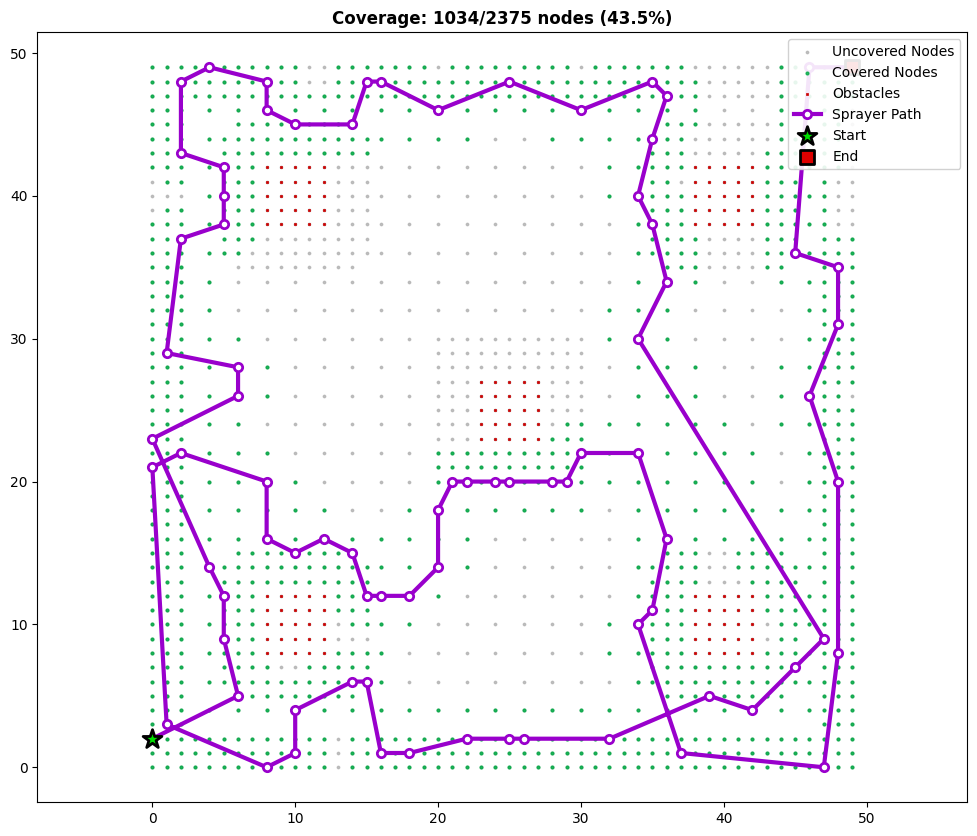

In [8]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)

In [9]:
solution.cache["hits_obstacle"]

np.False_

In [10]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.FSM_COVERAGE_PLANNER,
    phased_optimization=PhasedOptimizationParams(phase_iterations=[5, 1, 5], degradation_tolerances=[0, 0, 0]),
    tabu_radius=3,
    search_strategy='first'
)

term_criteria = TerminationCriteria(max_iterations=100)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

FSM Planner (Nearest Neighbor): Iniciando com 1115 nós alvo esparsos.
Path simplification reduced points from 1676 to 788.
Coverage: 1376/2375 nodes (57.9%)
Obstacles: 0/125 covered


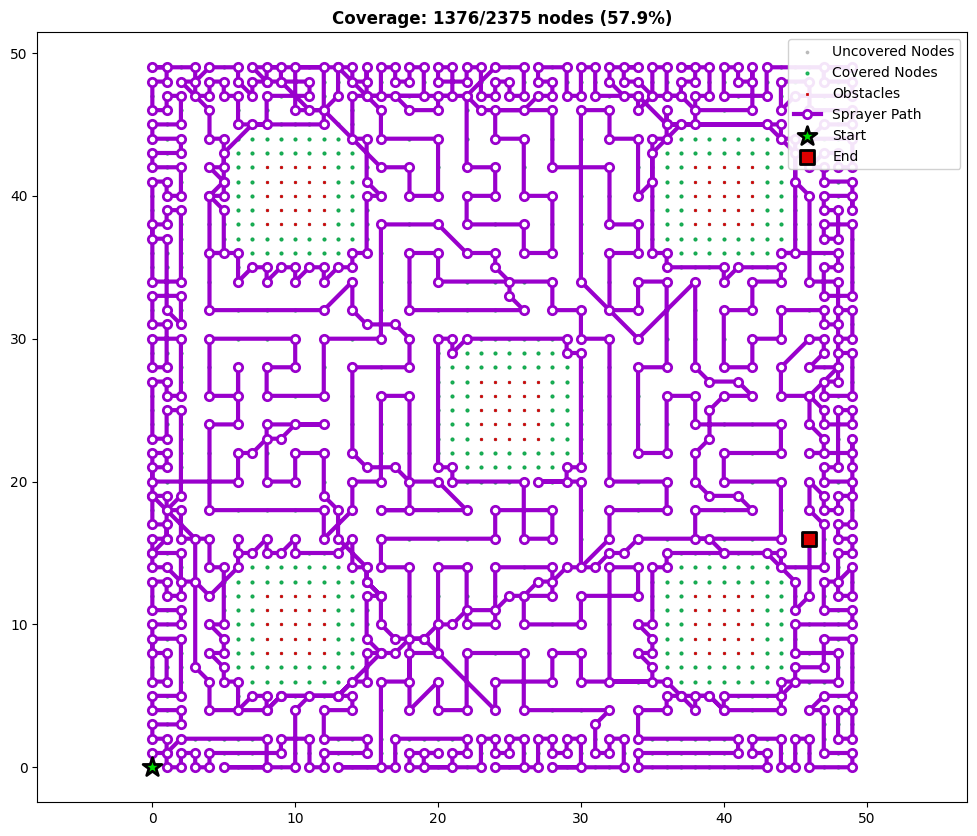

In [11]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [ ]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 3089.40
-----------------------------------------------------------
Iteration 0: Best ObjFun = 3089.40, Current ObjFun = 3089.40
--- Fase 1 estagnada (0 iterações). Trocando de fase. ---

=== Trocando para Fase 2 (Objetivo: Otimizar C2) ===
Iteration 1: Best ObjFun = 3089.40, Current ObjFun = 3089.40
Applying move: move with args (104, array([ 0, 14]))

=== Trocando para Fase 3 (Objetivo: Otimizar C3) ===
Iteration 2: Best ObjFun = 3087.75, Current ObjFun = 3087.75
Applying move: remove with args (648,)
Iteration 3: Best ObjFun = 3084.38, Current ObjFun = 3084.38
Applying move: remove with args (239,)
Iteration 4: Best ObjFun = 3081.15, Current ObjFun = 3081.15
Applying move: move with args (408, array([26,  8]))
Iteration 5: Best ObjFun = 3076.10, Current ObjFun = 3076.10
Applying move: insert with args ((np.int64(15), np.int64(43)), 521)
Iteration 

Coverage: 338/910 nodes (37.1%)
Obstacles: 0/125 covered


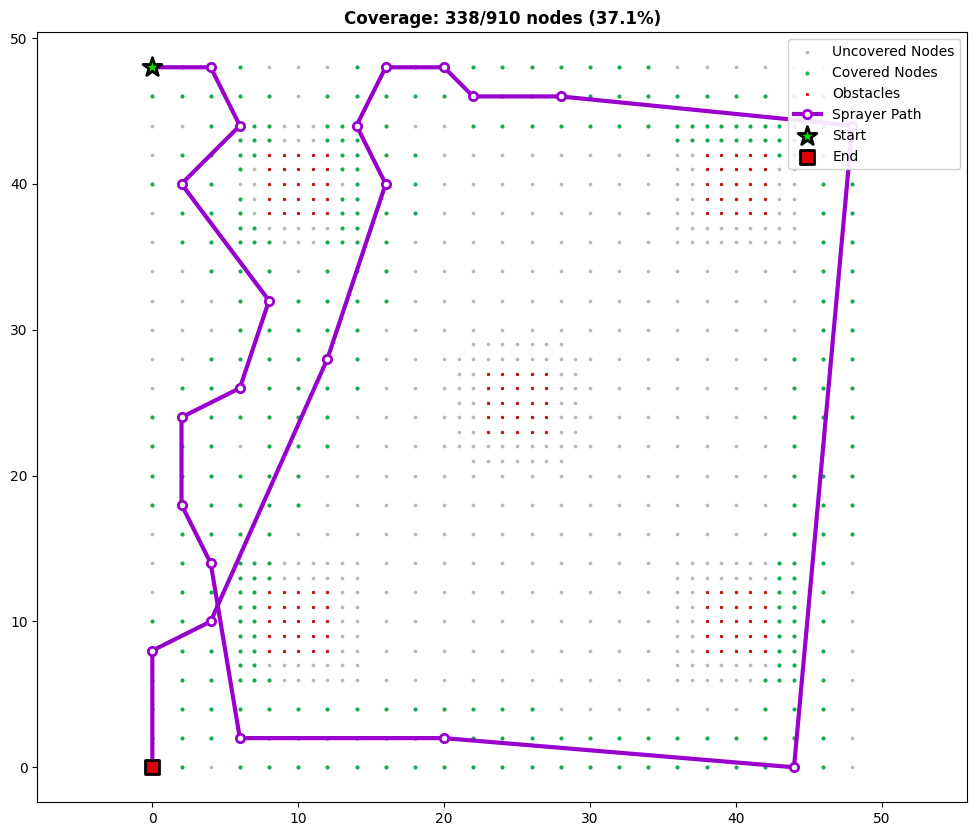

In [ ]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)

In [ ]:
strategy = TSStrategy(
    constructive_heuristic=ConstructiveHeuristicType.BOUSTROPHEDON_SEGMENTED,
    phased_optimization=PhasedOptimizationParams(phase_iterations=[5, 1, 5], degradation_tolerances=[0, 0, 0]),
    tabu_radius=3,
    search_strategy='first'
)

term_criteria = TerminationCriteria(max_iterations=200)
debug_options = DebugOptions(verbose=True)

ts = AgcspTS(instance, tenure=10, strategy=strategy, termination_criteria=term_criteria, debug_options=debug_options)

  Iniciando em (np.int64(0), np.int64(2))
Coverage: 48/910 nodes (5.3%)
Obstacles: 0/125 covered


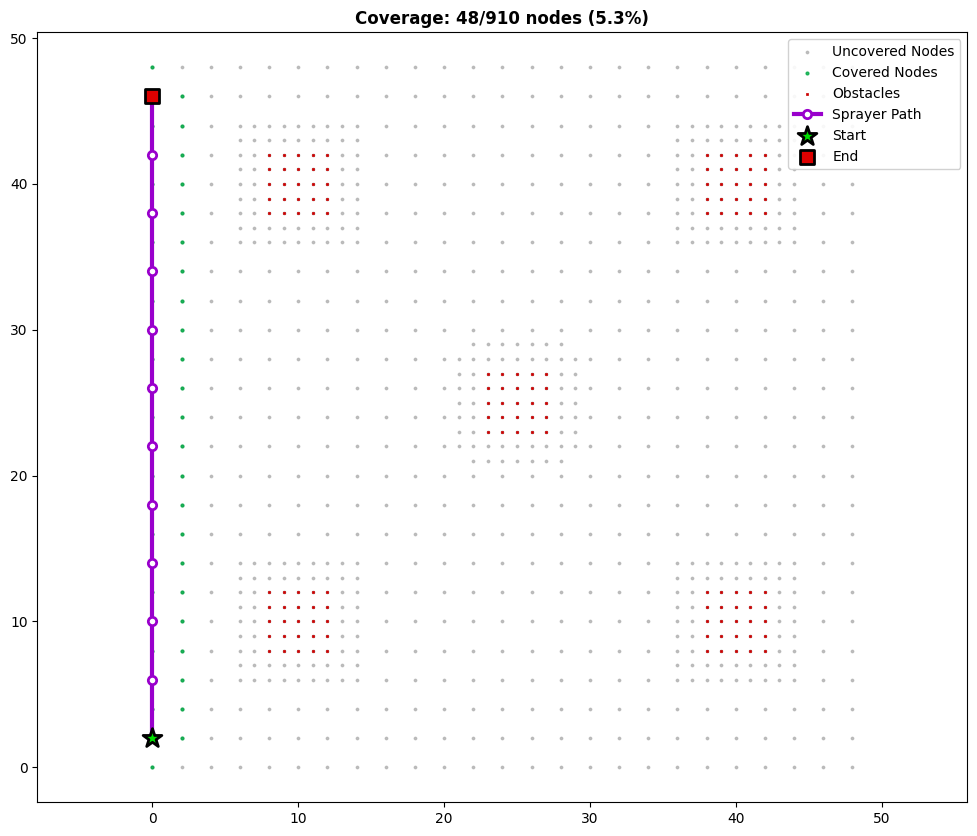

In [ ]:
initial_sol = ts._constructive_heuristic(strategy.constructive_heuristic)
display_grid_and_path(instance, evaluator, initial_sol.path)

In [ ]:
solution = ts.solve(initial_solution=initial_sol)

--- Iniciando TS com solução fornecida. ---
-----------------------------------------------------------
Initial solution objective value: 935.61
-----------------------------------------------------------
Iteration 0: Best ObjFun = 935.61, Current ObjFun = 935.61
** BEST IMPROVING PHASADO ACEITO ** Tipo: insert, Delta Foco (0): -21.0737
Applying move: insert with args ((np.int64(48), np.int64(48)), 12)
Iteration 1: Best ObjFun = 935.61, Current ObjFun = 963.53
** BEST IMPROVING PHASADO ACEITO ** Tipo: insert, Delta Foco (0): -19.9242
Applying move: insert with args ((np.int64(48), np.int64(0)), 0)
Iteration 2: Best ObjFun = 935.61, Current ObjFun = 992.61
** BEST IMPROVING PHASADO ACEITO ** Tipo: move, Delta Foco (0): -5.3642
Applying move: move with args (1, array([0, 6]))
Iteration 3: Best ObjFun = 935.61, Current ObjFun = 982.62
** BEST IMPROVING PHASADO ACEITO ** Tipo: insert, Delta Foco (0): -6.1305
Applying move: insert with args ((np.int64(8), np.int64(18)), 1)
Iteration 4: Best

Coverage: 684/910 nodes (75.2%)
Obstacles: 0/125 covered


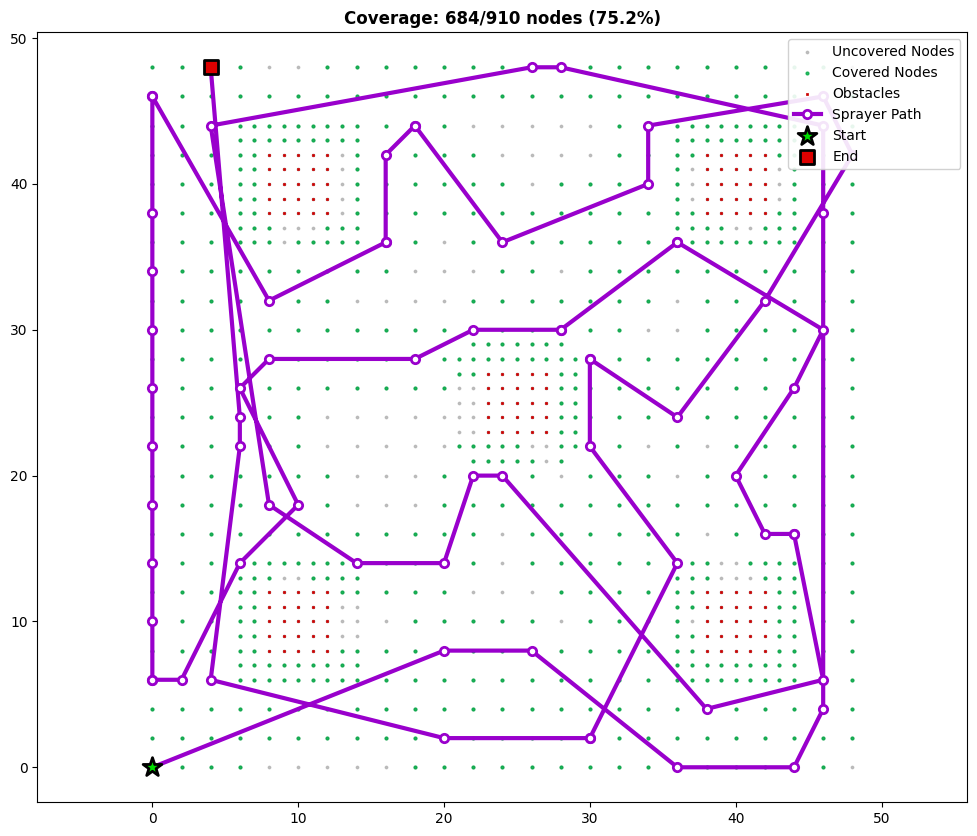

In [ ]:
last_solution = ts._current_solution
display_grid_and_path(instance, evaluator, last_solution.path)